# Error, trend, and seasonality (ETS) decomposition

The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS)

Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

Apply an <strong>additive model</strong> when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. linear grow, every year your account increases by 10k). 

A <strong>multiplicative model</strong> is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year you double your account balance).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

In [2]:
df = pd.read_parquet('C:/Users/gabri/Desktop/MADS/Git repos/time_series_clustering/data/closing_data.parquet')

In [3]:
df.head()

,LUN-BTC,BCD-BTC,STX-BTC,BNBBEAR-USDT,POA-BNB,BNT-BUSD,POA-BTC,CTXC-BNB,ETC-BUSD,XRPBULL-BUSD,...,ALGO-BUSD,REP-ETH,BCHSV-USDC,BCHABC-USDT,NCASH-ETH,VIBE-BTC,STRAT-USDT,ERD-USDT,DLT-BNB,LOOM-ETH
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


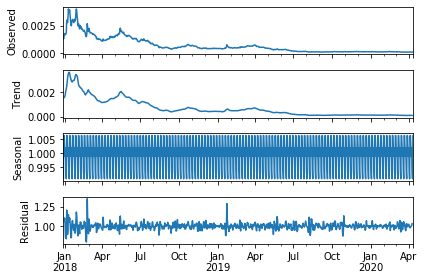

In [4]:
result = seasonal_decompose(df['LUN-BTC'].dropna(), model='multiplicative') 
result.plot();

In [5]:
result.trend

2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
2017-12-31    0.001542
2018-01-01    0.001599
                ...   
2020-04-08    0.000091
2020-04-09    0.000091
2020-04-10         NaN
2020-04-11         NaN
2020-04-12         NaN
Name: LUN-BTC, Length: 837, dtype: float64

In [6]:
result.seasonal

2017-12-28    0.993825
2017-12-29    0.990929
2017-12-30    1.006337
2017-12-31    1.006245
2018-01-01    1.001910
                ...   
2020-04-08    1.001873
2020-04-09    0.993825
2020-04-10    0.990929
2020-04-11    1.006337
2020-04-12    1.006245
Name: LUN-BTC, Length: 837, dtype: float64

In [7]:
result.resid

2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
2017-12-31    1.071323
2018-01-01    1.105252
                ...   
2020-04-08    1.005734
2020-04-09    1.031216
2020-04-10         NaN
2020-04-11         NaN
2020-04-12         NaN
Name: LUN-BTC, Length: 837, dtype: float64

In [8]:
decomposed = {}
for col in df.columns:
    try:
        decomposed[col] = seasonal_decompose(df[col].dropna(), model='multiplicative') 
    except:
        pass

In [9]:
decomposed['LUN-BTC'].trend

2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
2017-12-31    0.001542
2018-01-01    0.001599
                ...   
2020-04-08    0.000091
2020-04-09    0.000091
2020-04-10         NaN
2020-04-11         NaN
2020-04-12         NaN
Name: LUN-BTC, Length: 837, dtype: float64

In [10]:
# now we can use these components to cluster each of the time series. 
# eg: those with higher/lower residual variance, with positive or negative trends, 

In [11]:
type(decomposed['LUN-BTC'].resid) #it's a pandas series

pandas.core.series.Series

In [12]:
decomposed['LUN-BTC'].resid.std()

0.04398515045211647

In [29]:
list(range(len(decomposed['LUN-BTC'].trend.dropna())))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [25]:
decomposed['LUN-BTC'].trend.dropna().values

array([1.54214545e-03, 1.59948499e-03, 1.68347823e-03, 1.92457567e-03,
       2.11151551e-03, 2.25411904e-03, 2.46195385e-03, 2.79923839e-03,
       3.09797327e-03, 3.37012302e-03, 3.50174843e-03, 3.57268056e-03,
       3.60616376e-03, 3.51702818e-03, 3.29713380e-03, 3.15391525e-03,
       3.03829554e-03, 2.91647363e-03, 2.83826262e-03, 2.81213753e-03,
       2.83880608e-03, 2.91661120e-03, 2.94731428e-03, 2.93979514e-03,
       2.95169226e-03, 3.06417048e-03, 3.23469870e-03, 3.37473300e-03,
       3.41095752e-03, 3.39248544e-03, 3.32925848e-03, 3.26274113e-03,
       3.09943065e-03, 2.85157132e-03, 2.62915546e-03, 2.51857936e-03,
       2.44321378e-03, 2.43317229e-03, 2.37963964e-03, 2.32067711e-03,
       2.30587227e-03, 2.29631561e-03, 2.22920031e-03, 2.16560482e-03,
       2.10800867e-03, 2.07368095e-03, 2.04020754e-03, 1.99628843e-03,
       1.92870591e-03, 1.85230303e-03, 1.78457745e-03, 1.75494965e-03,
       1.84215896e-03, 1.89307083e-03, 1.91997770e-03, 1.96347708e-03,
      

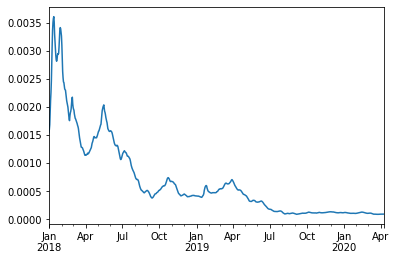

In [33]:
decomposed['LUN-BTC'].trend.dropna().plot()

In [30]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(decomposed['LUN-BTC'].trend
slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(len(decomposed['LUN-BTC'].trend.dropna()))),decomposed['LUN-BTC'].trend.dropna().values)

In [31]:
slope

-2.488751268163364e-06

In [32]:
intercept

0.0017080823918159765

In [48]:
names = []
std_residuals = []
slope_trend = []
for k in decomposed.keys():
    names.append(k)
    std_residuals.append(decomposed[k].resid.std())
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(len(decomposed[k].trend.dropna()))),
                                                                   decomposed[k].trend.dropna().values)
    slope_trend.append(slope)

C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalar

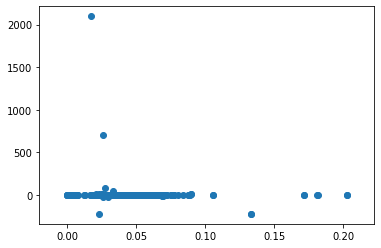

In [49]:
plt.scatter(std_residuals,slope_trend)

In [60]:
# removing outliers

names = []
std_residuals = []
slope_trend = []
for k in decomposed.keys():
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(len(decomposed[k].trend.dropna()))),
                                                                   decomposed[k].trend.dropna().values)
    if np.abs(slope) > 10:
        next
    else:    
        slope_trend.append(slope)
        std_residuals.append(decomposed[k].resid.std())
        names.append(k)
    
    

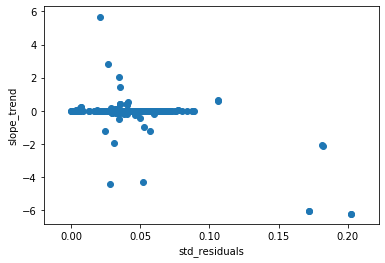

In [63]:
plt.scatter(std_residuals,slope_trend)
plt.xlabel('std_residuals')
plt.ylabel('slope_trend');